In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re sizing all images
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [3]:
# Importing the Vgg 16 
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:

# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
folders = glob('Dataset/Train/*')

In [6]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [7]:

# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:

from tensorflow.keras.layers import MaxPooling2D

In [11]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 2,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:

training_set

In [16]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 2,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
208/208 [==============================] - 76s 365ms/step - loss: 0.9771 - accuracy: 0.5673 - val_loss: 0.7827 - val_accuracy: 0.3209
Epoch 2/50
208/208 [==============================] - 67s 322ms/step - loss: 0.6666 - accuracy: 0.6034 - val_loss: 0.6594 - val_accuracy: 0.6567
Epoch 3/50
208/208 [==============================] - 72s 345ms/step - loss: 0.4560 - accuracy: 0.7981 - val_loss: 1.1626 - val_accuracy: 0.3433
Epoch 4/50
208/208 [==============================] - 69s 330ms/step - loss: 0.5827 - accuracy: 0.6803 - val_loss: 0.8783 - val_accuracy: 0.6045
Epoch 5/50
208/208 [==============================] - 75s 360ms/step - loss: 0.4274 - accuracy: 0.8245 - val_loss: 0.6187 - val_accuracy: 0.6567
Epoch 6/50
208/208 [==============================] - 74s 355ms/step - loss: 0.2342 - accuracy: 0.9231 - val_loss: 0.2300 - val_accuracy: 0.9179
Epoch 7/50
208/208 [==============================] - 

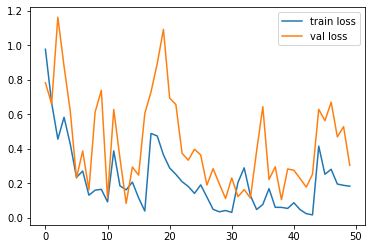

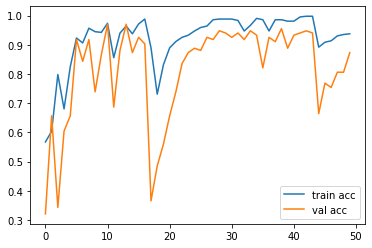

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [28]:
y_pred = model.predict(test_set)

In [29]:

y_pred

array([[3.17382872e-01, 6.82617188e-01],
       [1.00000000e+00, 3.98446410e-33],
       [1.00000000e+00, 4.18354909e-15],
       [1.00000000e+00, 2.47316140e-10],
       [1.00000000e+00, 5.74524705e-19],
       [3.00629377e-01, 6.99370623e-01],
       [5.44677079e-01, 4.55322832e-01],
       [6.56457901e-01, 3.43542129e-01],
       [3.43232036e-01, 6.56767964e-01],
       [2.83361554e-01, 7.16638446e-01],
       [1.00000000e+00, 1.57943125e-09],
       [2.90914118e-01, 7.09085882e-01],
       [9.99900818e-01, 9.91899942e-05],
       [9.99763906e-01, 2.36143489e-04],
       [1.00000000e+00, 0.00000000e+00],
       [2.05590039e-01, 7.94409931e-01],
       [1.00000000e+00, 5.26707745e-16],
       [1.00000000e+00, 1.07211847e-24],
       [9.99998689e-01, 1.28882164e-06],
       [3.35080475e-01, 6.64919555e-01],
       [1.00000000e+00, 3.11546680e-38],
       [1.00000000e+00, 2.77901971e-23],
       [4.25023615e-01, 5.74976385e-01],
       [9.89051640e-01, 1.09483041e-02],
       [1.000000

In [30]:
y_pred.shape

(134, 2)

In [31]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:

y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0], dtype=int64)

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('Dataset/Test/Parasite/11.png',target_size=(224,224))

In [ ]:
img

In [ ]:

x=image.img_to_array(img)
x

In [ ]:

x=x/255

In [ ]:
x.shape

In [ ]:
x1 = x.reshape(-1,224,224,3)

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
y =model.predict(img_data)


In [ ]:
z =model.predict(x1)
z

In [ ]:
y.shape

In [ ]:
y

In [ ]:
a=np.argmax(y)

In [ ]:
a

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

In [ ]:
img1=image.load_img('Dataset/Test/Uninfected/11.png',target_size=(224,224))

In [ ]:
img1

In [ ]:
x1=image.img_to_array(img1)